In [1]:
# docker pull emacski/tensorflow-serving:latest-linux_arm64
# docker run -t --rm -p 8501:8501 --mount type=bind,source=/tmp/model_name/,target=/models/model_name/ -e MODEL_NAME=model_name emacski/tensorflow-serving:latest-linux_arm64

In [1]:
#!docker start #como iniciar da  linha de comando
!open --background -a Docker

In [2]:
# test docker
!docker run hello-world


Hello from Docker!
This message shows that your installation appears to be working correctly.

To generate this message, Docker took the following steps:
 1. The Docker client contacted the Docker daemon.
 2. The Docker daemon pulled the "hello-world" image from the Docker Hub.
    (arm64v8)
 3. The Docker daemon created a new container from that image which runs the
    executable that produces the output you are currently reading.
 4. The Docker daemon streamed that output to the Docker client, which sent it
    to your terminal.

To try something more ambitious, you can run an Ubuntu container with:
 $ docker run -it ubuntu bash

Share images, automate workflows, and more with a free Docker ID:
 https://hub.docker.com/

For more examples and ideas, visit:
 https://docs.docker.com/get-started/



In [3]:
#!docker pull tensorflow/serving

In [4]:
# # esse funciona para quem n tem m1
#!docker pull tensorflow/serving:latest-gpu

In [5]:
# conda install tensorflow

In [6]:
import tensorflow as tf

In [7]:
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B0, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np

In [8]:
model = EfficientNetV2B0(weights='imagenet')

In [9]:
pwd

'/Users/csamp/Documents/stack_ab/tf_serving'

In [10]:
# img_path = 'tf_serving/lion.jpg'
img_path = 'pexels-artūras-kokorevas-10547480.jpg'

resized_height, resized_width = (224, 224)
img = image.load_img(img_path, 
                     target_size=(resized_height, resized_width))

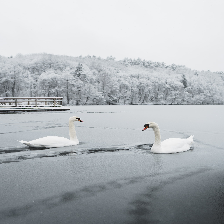

In [11]:
img

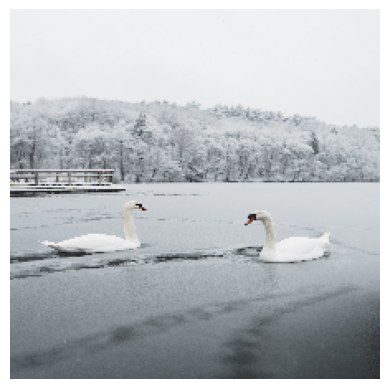

In [12]:
from matplotlib import pyplot as plt
plt.imshow(img)
plt.axis('off');

In [13]:
img_arr = image.img_to_array(img)
print(img_arr.shape) # outputs (224, 224, 3)

(224, 224, 3)


In [14]:
# add a dimension to transform the array into a batch
exp_arr = np.expand_dims(img_arr, axis=0)
exp_arr.shape # outputs (1, 224, 224, 3)

(1, 224, 224, 3)

In [15]:
# preprocess the batch, this does channel-wise color normalization
x = preprocess_input(exp_arr)
x.shape

(1, 224, 224, 3)

In [16]:
import time
# returns the time as a floating point number expressed in seconds since
print(int(time.time()))
print(time.time())

1673951758
1673951758.143296


In [106]:
# norm_img
# model = EfficientNetV2B0()
from tensorflow.keras.applications import MobileNetV3Small  #import ConvNeXtSmall
model = MobileNetV3Small()

In [107]:
model.summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_3 (Rescaling)        (None, None, None,   0           ['input_4[0][0]']                
                                3)                                                                
                                                                                                  
 Conv (Conv2D)                  (None, None, None,   432         ['rescaling_3[0][0]']            
                                16)                                                

                                                                                                  
 expanded_conv_1/depthwise/Batc  (None, None, None,   288        ['expanded_conv_1/depthwise[0][0]
 hNorm (BatchNormalization)     72)                              ']                               
                                                                                                  
 re_lu_37 (ReLU)                (None, None, None,   0           ['expanded_conv_1/depthwise/Batch
                                72)                              Norm[0][0]']                     
                                                                                                  
 expanded_conv_1/project (Conv2  (None, None, None,   1728       ['re_lu_37[0][0]']               
 D)                             24)                                                               
                                                                                                  
 expanded_

 expanded_conv_3/squeeze_excite  (None, 1, 1, 96)    0           ['multiply_21[0][0]']            
 /AvgPool (GlobalAveragePooling                                                                   
 2D)                                                                                              
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    2328        ['expanded_conv_3/squeeze_excite/
 /Conv (Conv2D)                                                  AvgPool[0][0]']                  
                                                                                                  
 expanded_conv_3/squeeze_excite  (None, 1, 1, 24)    0           ['expanded_conv_3/squeeze_excite/
 /Relu (ReLU)                                                    Conv[0][0]']                     
                                                                                                  
 expanded_

                                                                                                  
 re_lu_45 (ReLU)                (None, 1, 1, 240)    0           ['tf.__operators__.add_35[0][0]']
                                                                                                  
 tf.math.multiply_35 (TFOpLambd  (None, 1, 1, 240)   0           ['re_lu_45[0][0]']               
 a)                                                                                               
                                                                                                  
 expanded_conv_4/squeeze_excite  (None, None, None,   0          ['multiply_23[0][0]',            
 /Mul (Multiply)                240)                              'tf.math.multiply_35[0][0]']    
                                                                                                  
 expanded_conv_4/project (Conv2  (None, None, None,   9600       ['expanded_conv_4/squeeze_excite/
 D)       

 D)                             40)                              Mul[0][0]']                      
                                                                                                  
 expanded_conv_5/project/BatchN  (None, None, None,   160        ['expanded_conv_5/project[0][0]']
 orm (BatchNormalization)       40)                                                               
                                                                                                  
 expanded_conv_5/Add (Add)      (None, None, None,   0           ['expanded_conv_4/Add[0][0]',    
                                40)                               'expanded_conv_5/project/BatchNo
                                                                 rm[0][0]']                       
                                                                                                  
 expanded_conv_6/expand (Conv2D  (None, None, None,   4800       ['expanded_conv_5/Add[0][0]']    
 )        

 tf.__operators__.add_42 (TFOpL  (None, None, None,   0          ['expanded_conv_7/expand/BatchNor
 ambda)                         144)                             m[0][0]']                        
                                                                                                  
 re_lu_52 (ReLU)                (None, None, None,   0           ['tf.__operators__.add_42[0][0]']
                                144)                                                              
                                                                                                  
 tf.math.multiply_42 (TFOpLambd  (None, None, None,   0          ['re_lu_52[0][0]']               
 a)                             144)                                                              
                                                                                                  
 multiply_28 (Multiply)         (None, None, None,   0           ['expanded_conv_7/expand/BatchNor
          

                                288)                             m[0][0]',                        
                                                                  'tf.math.multiply_45[0][0]']    
                                                                                                  
 expanded_conv_8/depthwise/pad   (None, None, None,   0          ['multiply_30[0][0]']            
 (ZeroPadding2D)                288)                                                              
                                                                                                  
 expanded_conv_8/depthwise (Dep  (None, None, None,   7200       ['expanded_conv_8/depthwise/pad[0
 thwiseConv2D)                  288)                             ][0]']                           
                                                                                                  
 expanded_conv_8/depthwise/Batc  (None, None, None,   1152       ['expanded_conv_8/depthwise[0][0]
 hNorm (Ba

 re_lu_59 (ReLU)                (None, None, None,   0           ['tf.__operators__.add_49[0][0]']
                                576)                                                              
                                                                                                  
 tf.math.multiply_49 (TFOpLambd  (None, None, None,   0          ['re_lu_59[0][0]']               
 a)                             576)                                                              
                                                                                                  
 multiply_33 (Multiply)         (None, None, None,   0           ['expanded_conv_9/depthwise/Batch
                                576)                             Norm[0][0]',                     
                                                                  'tf.math.multiply_49[0][0]']    
                                                                                                  
 expanded_

 expanded_conv_10/squeeze_excit  (None, 1, 1, 576)   0           ['multiply_35[0][0]']            
 e/AvgPool (GlobalAveragePoolin                                                                   
 g2D)                                                                                             
                                                                                                  
 expanded_conv_10/squeeze_excit  (None, 1, 1, 144)   83088       ['expanded_conv_10/squeeze_excite
 e/Conv (Conv2D)                                                 /AvgPool[0][0]']                 
                                                                                                  
 expanded_conv_10/squeeze_excit  (None, 1, 1, 144)   0           ['expanded_conv_10/squeeze_excite
 e/Relu (ReLU)                                                   /Conv[0][0]']                    
                                                                                                  
 expanded_

In [108]:
print(len(model.layers))

239


In [109]:
len(model.weights)

210

In [110]:
preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)

print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 0s 265ms/step
Predicted: [('n02134084', 'ice_bear', 0.116496086), ('n09332890', 'lakeside', 0.11016267), ('n03218198', 'dogsled', 0.07911277)]


In [111]:
decoded_preds = decode_predictions(preds)
print('Predicted:', decoded_preds)

Predicted: [[('n02134084', 'ice_bear', 0.116496086), ('n09332890', 'lakeside', 0.11016267), ('n03218198', 'dogsled', 0.07911277), ('n02894605', 'breakwater', 0.06566987), ('n09421951', 'sandbar', 0.055183545)]]


In [113]:
# print(preds)

In [24]:
import time
current_time = int(time.time())
path = f"effv2b0/{current_time}"
model.save(path)

INFO:tensorflow:Assets written to: effv2b0/1673951764/assets


INFO:tensorflow:Assets written to: effv2b0/1673951764/assets


In [25]:
path

'effv2b0/1673951764'

In [26]:
# # how the folder should look like
# ├── effv2b0
# │ ├── 1673311761
# │ │ ├── assets
# │ │ ├── saved_model.pb
# │ │ └── variables

In [27]:
# esse funciona
#!docker pull emacski/tensorflow-serving:latest-linux_arm64

In [30]:
#docker pull tensorflow/serving
# esse funciona
!docker run --rm -p 8501:8501 \
        --name tfserving_effv2 \
        -v "/Users/csamp/Documents/stack_ab/effv2b0:/models/effv2b0" \
        -e MODEL_NAME=effv2b0 \
        emacski/tensorflow-serving:latest-linux_arm64

2023-01-17 10:37:37.098481: I external/tf_serving/tensorflow_serving/model_servers/server.cc:89] Building single TensorFlow model file config:  model_name: effv2b0 model_base_path: /models/effv2b0
2023-01-17 10:37:37.098867: I external/tf_serving/tensorflow_serving/model_servers/server_core.cc:465] Adding/updating models.
2023-01-17 10:37:37.098876: I external/tf_serving/tensorflow_serving/model_servers/server_core.cc:591]  (Re-)adding model: effv2b0
2023-01-17 10:37:37.209755: I external/tf_serving/tensorflow_serving/core/basic_manager.cc:740] Successfully reserved resources to load servable {name: effv2b0 version: 1670550215}
2023-01-17 10:37:37.209790: I external/tf_serving/tensorflow_serving/core/loader_harness.cc:66] Approving load for servable version {name: effv2b0 version: 1670550215}
2023-01-17 10:37:37.209800: I external/tf_serving/tensorflow_serving/core/loader_harness.cc:74] Loading servable version {name: effv2b0 version: 1670550215}
2023-01-17 10:37:37.210298: I external/

In [34]:
#x.tolist()

In [90]:
import json
import requests

endpoint = 'http://localhost:8501/v1/models/effv2b0:predict'
header = {"content-type": "application/json"}
batch_json = json.dumps({"instances": x.tolist()})
#run_prediction(data,headers,endpoint)

In [117]:
# API endpoint can be accessed at http://localhost:8501. 

In [93]:
json_res = requests.post(url=endpoint, data=batch_json, 
                              headers=header)

In [94]:
json_res

<Response [200]>

In [98]:
# json_response = requests.post(url=endpoint, data=batch_json, headers=header)
server_preds = json.loads(json_res.text)
#print('Predicted:', decode_predictions(predictions))#, top=3)[0])

In [102]:
type(server_preds['predictions'])

list

In [97]:
print('Predicted:', decode_predictions(np.array(server_preds['predictions'])))

Predicted: [[('n09332890', 'lakeside', 0.295589358), ('n09421951', 'sandbar', 0.243745327), ('n01855672', 'goose', 0.10379523), ('n02894605', 'breakwater', 0.0317126848), ('n09428293', 'seashore', 0.0310558397)]]


In [87]:
# def run_prediction(data,headers,endpoint):
#     json_response = requests.post(endpoint,data=data,headers=headers)
#     prediction = json.loads(json_response.text)
#     return (decode_predictions(np.array(preds), top=3)[0])

In [88]:
# run_prediction(data,headers,endpoint)

In [52]:
# # code from https://cnvrg.io/how-to-serve-a-model-with-tensorflow/
# # funciona também
# !docker run -t --rm -p 8501:8501 \
#     -v "/Users/csamp/Documents/stack_ab/effv2b0/:/models/effv2b0/" \
#     -e MODEL_NAME=effv2b0 \
#     emacski/tensorflow-serving:latest-linux_arm64

In [56]:
# <!-- fonte com hugging face: https://towardsdatascience.com/use-pre-trained-huggingface-models-in-tensorflow-serving-d2761f7e69f6 -->

# <!-- mais completo: https://cnvrg.io/how-to-serve-a-model-with-tensorflow/ -->
# <!-- https://www.pexels.com/ -->

# <!-- https://neptune.ai/blog/how-to-serve-machine-learning-models-with-tensorflow-serving-and-docker -->

# <!--https://github.com/tensorflow/serving/blob/master/tensorflow_serving/g3doc/building_with_docker.md -->
# <!-- https://towardsdatascience.com/use-pre-trained-huggingface-models-in-tensorflow-serving-d2761f7e69f6 -->
# <!-- https://cnvrg.io/how-to-serve-a-model-with-tensorflow/-->